In [ ]:
fill nan values comments

In [ ]:
# df['col1'] = df['col1'].fillna(df['col1'].median()) fill null values in one column
# df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].median()) fill null in two columns
# df = df.fillna(df.median())     fill null values in all columns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('vaccine_prediction.csv')

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [7]:
num = df.select_dtypes(exclude='object')
num 

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0


In [8]:
cat = df.select_dtypes(include='object')
cat

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA


# basic info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# finding null values

In [42]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

# deleting column because it as null values more than 25%

In [47]:
df.drop(columns=["has_health_insur","unique_id"],inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

# basic info

In [14]:
df['h1n1_worry'].value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [13]:
df['h1n1_awareness'].value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [15]:
df['antiviral_medication'].value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [16]:
df['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [17]:
df['bought_face_mask'].value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [18]:
df['wash_hands_frequently'].value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [19]:
df['avoid_large_gatherings'].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [20]:
df['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [21]:
df['dr_recc_h1n1_vacc'].value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [22]:
df['dr_recc_seasonal_vacc'].value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [23]:
 
df['cont_child_undr_6_mnths'].value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [24]:
df['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [25]:
df['is_h1n1_vacc_effective'].value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [26]:
df['sick_from_h1n1_vacc'].value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [27]:
df['is_seas_risky'].value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [28]:
df['sick_from_seas_vacc'].value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [86]:
df['chronic_medic_condition'].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [87]:
df['cont_child_undr_6_mnths'].value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [90]:
df['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [92]:
df['is_h1n1_vacc_effective'].value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [97]:
df['is_h1n1_risky'].value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [98]:
df['sick_from_h1n1_vacc'].value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [101]:
df['is_seas_vacc_effective'].value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [102]:
df['is_seas_risky'].value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [105]:
df['sick_from_seas_vacc'].value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [29]:
df['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [30]:
df['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [31]:
df['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [32]:
df['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [33]:
df['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [34]:
df['no_of_adults'].value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [35]:
df['no_of_children'].value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [39]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [56]:
df['has_health_insur'].value_counts()

1.0    12697
0.0     1736
Name: has_health_insur, dtype: int64

# checking null values

In [48]:
 df.isnull().sum() * 100 / len(df)

h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                           0.000000
income_level                 16.561201
marital_status           

# descriptive analysis

In [46]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [72]:
# df[['h1n1_worry','h1n1_awareness','antiviral_medication']] = df[['h1n1_worry','h1n1_awareness','antiviral_medication']].fillna(df[['h1n1_worry','h1n1_awareness','antiviral_medication']].median())

In [74]:
# df[['contact_avoidance','bought_face_mask','wash_hands_frequently']] = df[['contact_avoidance','bought_face_mask','wash_hands_frequently']].fillna(df[['contact_avoidance','bought_face_mask','wash_hands_frequently']].median())

In [82]:
# df[['avoid_touch_face','dr_recc_h1n1_vacc']] = df[['avoid_touch_face','dr_recc_h1n1_vacc']].fillna(df[['avoid_touch_face','dr_recc_h1n1_vacc']].median())

In [84]:
# df[['dr_recc_seasonal_vacc']] = df[['dr_recc_seasonal_vacc']].fillna(df[['dr_recc_seasonal_vacc']].median())

In [ ]:
# df[['dr_recc_seasonal_vacc']] = df[['dr_recc_seasonal_vacc']].fillna(df[['dr_recc_seasonal_vacc']].median())

In [88]:
# df[['chronic_medic_condition','cont_child_undr_6_mnths']] = df[['chronic_medic_condition','cont_child_undr_6_mnths']].fillna(df[['chronic_medic_condition','cont_child_undr_6_mnths']].median())

In [95]:
# df[['is_health_worker','is_h1n1_vacc_effective']] = df[['is_health_worker','is_h1n1_vacc_effective']].fillna(df[['is_health_worker','is_h1n1_vacc_effective']].median())

In [99]:
# df[['is_h1n1_risky','sick_from_h1n1_vacc']] = df[['is_h1n1_risky','sick_from_h1n1_vacc']].fillna(df[['is_h1n1_risky','sick_from_h1n1_vacc']].median())

In [103]:
# df[['is_seas_vacc_effective','is_seas_risky']] = df[['is_seas_vacc_effective','is_seas_risky']].fillna(df[['is_seas_vacc_effective','is_seas_risky']].median())

In [106]:
# df[['sick_from_seas_vacc']] = df[['sick_from_seas_vacc']].fillna(df[['sick_from_seas_vacc']].median())

In [113]:
# df[['no_of_adults']] = df[['no_of_adults']].fillna(df[['no_of_adults']].mean())

In [115]:
# df[['no_of_children']] = df[['no_of_children']].fillna(df[['no_of_children']].mean())

# fill null values using median if it as discrete values
# if continuoues use mean
# if categorical use mode

In [49]:
df[df['h1n1_worry'].isna()]

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
44,NaN,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,0,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
96,NaN,1.0,0.0,1.0,0.0,1.0,0.0,NaN,0.0,1.0,...,White,0,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
150,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,White,0,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
411,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,White,0,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,1
758,NaN,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,...,White,0,NaN,Not Married,Rent,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25788,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,0,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
25883,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,0,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
25948,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Black,0,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,1
26358,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,...,White,0,Below Poverty,Not Married,Rent,Not in Labor Force,Non-MSA,0.0,0.0,0


In [50]:
for i in df.columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [7]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

# normality test

In [17]:
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    pos=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            pos.append(i)
            out.append(j)
    return pos, out

def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")

def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)

In [22]:
import seaborn as sns
from scipy.stats import shapiro
normality_test('h1n1_worry')

ValueError: Data must be at least length 3.

C:\Users\Ashok\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The statistic value is 0.8770697116851807 with p-value : 0.0
h1n1_worry is not normally distributed
Outlier : ([], [])


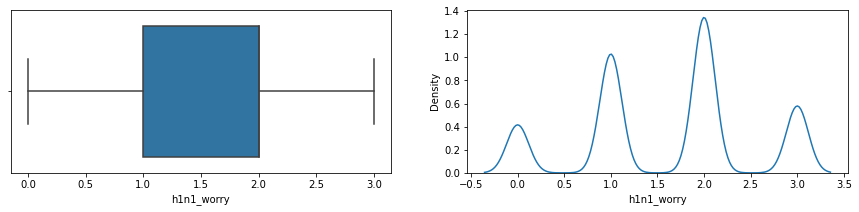

In [23]:
feature_box_kde_normality('h1n1_worry')

In [ ]:
above curve shows it is categorical data, because same values are repeated and it is not normally distributed

# LABEL ENCODING

In [ ]:
# since it is a categorical data , we can convert it into 0,1 values using label ending

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
df.sex=le.fit_transform(df.sex)

In [26]:
df.sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 26707 entries, 0 to 26706
Series name: sex
Non-Null Count  Dtype
--------------  -----
26707 non-null  int32
dtypes: int32(1)
memory usage: 104.4 KB


In [27]:
df['sex'].value_counts()

0    15858
1    10849
Name: sex, dtype: int64

# data analysis

(array([ 3296.,     0.,     0.,  8153.,     0.,     0., 10575.,     0.,
            0.,  4591.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

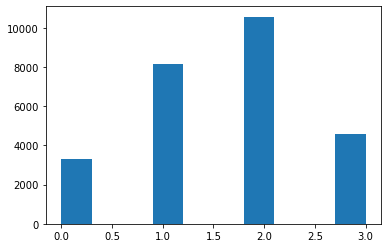

In [49]:
plt.hist(df['h1n1_worry'])

<AxesSubplot:xlabel='h1n1_worry', ylabel='count'>

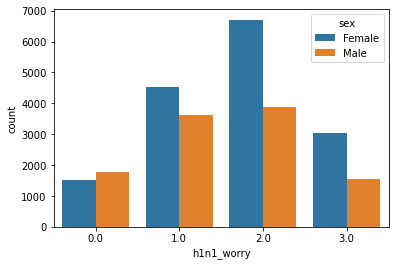

In [40]:
sns.countplot(x='h1n1_worry',hue='sex',data=df)

In [22]:
df.loc[:,['h1n1_worry','sex']]

,h1n1_worry,sex
0,1.0,Female
1,3.0,Male
2,1.0,Male
3,1.0,Female
4,2.0,Female
...,...,...
26702,2.0,Female
26703,1.0,Male
26704,2.0,Female
26705,1.0,Female


In [23]:
df.loc[:,['h1n1_worry','sex']].value_counts(normalize=True)

h1n1_worry  sex   
2.0         Female    0.251888
1.0         Female    0.170130
2.0         Male      0.145444
1.0         Male      0.136201
3.0         Female    0.114635
0.0         Male      0.066880
3.0         Male      0.057862
0.0         Female    0.056960
dtype: float64

<AxesSubplot:xlabel='h1n1_awareness', ylabel='count'>

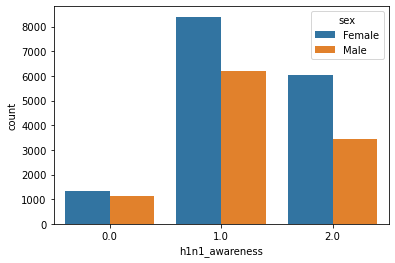

In [82]:
sns.countplot(x='h1n1_awareness',hue='sex',data=df)

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

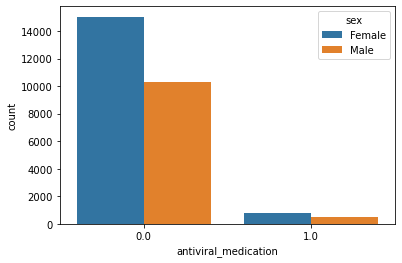

In [83]:
sns.countplot(x='antiviral_medication',hue='sex',data=df)

<AxesSubplot:xlabel='antiviral_medication', ylabel='count'>

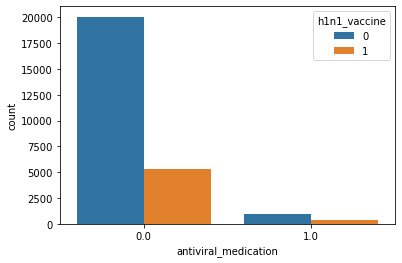

In [84]:
sns.countplot(x='antiviral_medication',hue='h1n1_vaccine',data=df)

<AxesSubplot:xlabel='contact_avoidance', ylabel='count'>

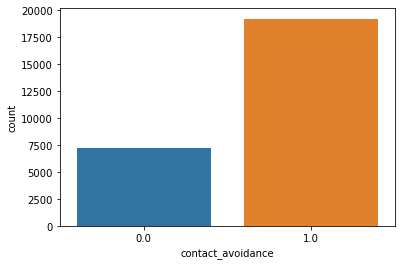

In [87]:
sns.countplot(data=df,x='contact_avoidance')

<AxesSubplot:xlabel='bought_face_mask', ylabel='count'>

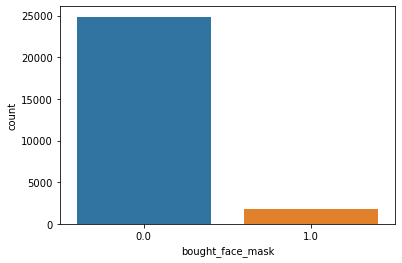

In [92]:
sns.countplot(data=df,x='bought_face_mask')

<AxesSubplot:xlabel='wash_hands_frequently', ylabel='count'>

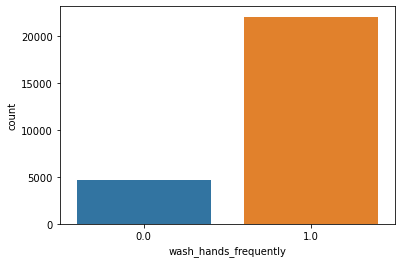

In [93]:
sns.countplot(data=df,x='wash_hands_frequently')

<AxesSubplot:xlabel='avoid_large_gatherings', ylabel='count'>

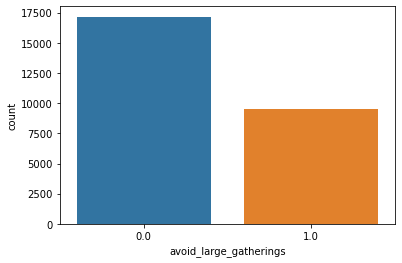

In [10]:
sns.countplot(data=df,x='avoid_large_gatherings')

<AxesSubplot:xlabel='reduced_outside_home_cont', ylabel='count'>

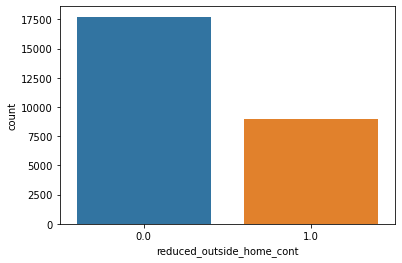

In [11]:
sns.countplot(data=df,x='reduced_outside_home_cont')

<AxesSubplot:xlabel='reduced_outside_home_cont', ylabel='count'>

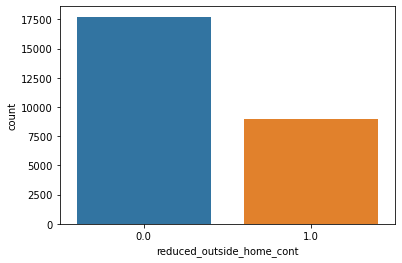

In [12]:
sns.countplot(data=df,x='reduced_outside_home_cont')

<AxesSubplot:xlabel='avoid_touch_face', ylabel='count'>

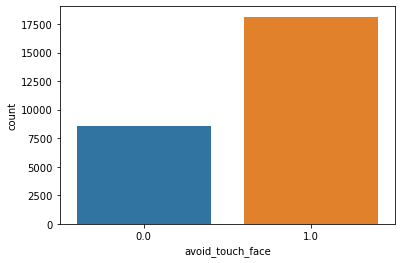

In [13]:
sns.countplot(data=df,x='avoid_touch_face')

In [ ]:
Avoids touching nose, eyes, mouth is high . so this may be one of the reason for infection.

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

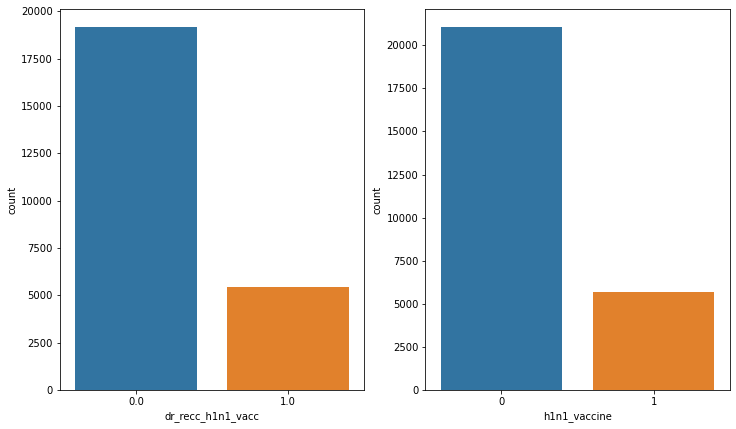

In [4]:
fig, (ax1,ax2)  = plt.subplots(1,2,figsize=(12,7))
sns.countplot(data=df,x='dr_recc_h1n1_vacc', ax=ax1)
sns.countplot(data=df,x='h1n1_vaccine', ax=ax2)

<AxesSubplot:xlabel='dr_recc_seasonal_vacc', ylabel='count'>

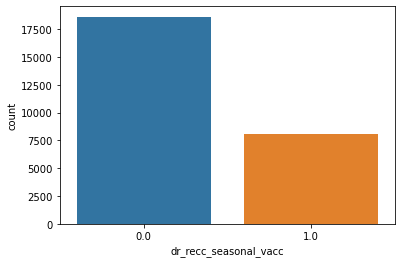

In [15]:
sns.countplot(data=df,x='dr_recc_seasonal_vacc')

<AxesSubplot:xlabel='sex', ylabel='chronic_medic_condition'>

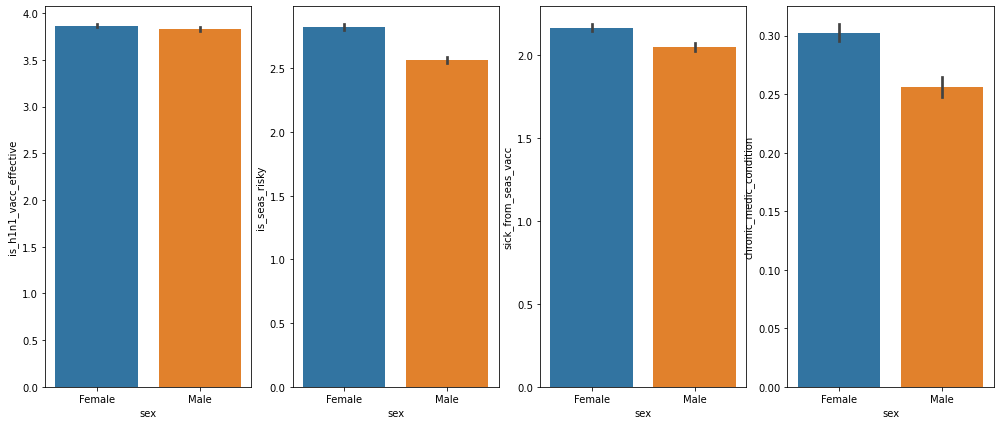

In [58]:
fig, (ax1,ax2,ax3,ax4)  = plt.subplots(1,4,figsize=(17,7))
sns.barplot(y='is_h1n1_vacc_effective', x='sex', data=df, ax=ax1)
sns.barplot(y='is_seas_risky', x='sex', data=df, ax=ax2)
sns.barplot(y='sick_from_seas_vacc',x='sex', data=df, ax=ax3)
sns.barplot(y='chronic_medic_condition',x='sex', data=df, ax=ax4)


<AxesSubplot:xlabel='sex', ylabel='h1n1_awareness'>

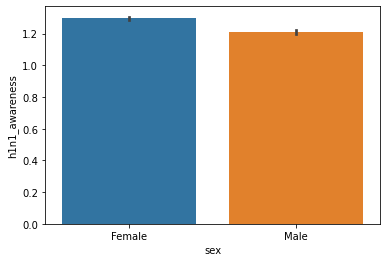

In [67]:
sns.barplot(data=df, x="sex", y="h1n1_awareness")

<AxesSubplot:xlabel='qualification', ylabel='count'>

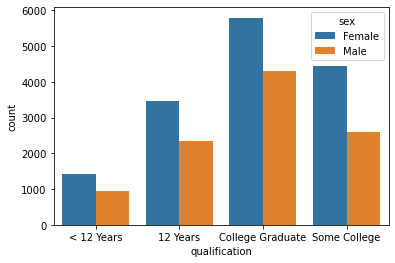

In [78]:
sns.countplot(x='qualification',hue='sex',data=df)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

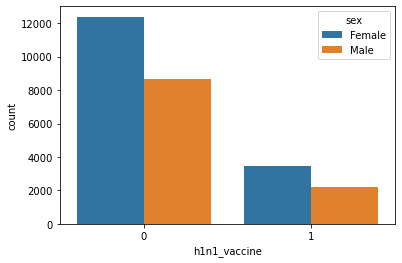

In [79]:
sns.countplot(x='h1n1_vaccine', hue='sex', data=df)

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

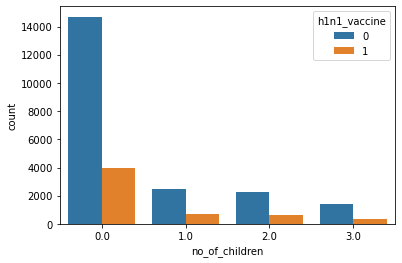

In [80]:
sns.countplot(x='no_of_children',hue='h1n1_vaccine', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

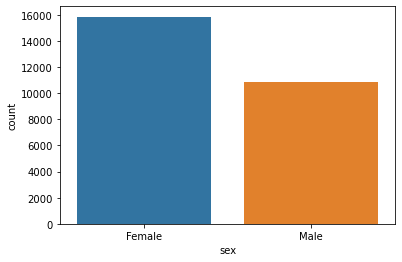

In [43]:
sns.countplot(x='sex',data=df)

In [ ]:

chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine       

# logistic regression model building

In [65]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [71]:
x_encoded=pd.get_dummies(x,drop_first=True)
x_encoded

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race_Other or Multiple,race_White,"income_level_> $75,000",income_level_Below Poverty,marital_status_Not Married,housing_status_Rent,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0,1,0,1,1,0,1,0,0,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,1,1,1,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,0,1,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,1,0,1,0,0,1
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,1,0,0,1,1,0,0,1,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,1,0,0,0,0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [73]:
x_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   h1n1_worry                      26707 non-null  float64
 1   h1n1_awareness                  26707 non-null  float64
 2   antiviral_medication            26707 non-null  float64
 3   contact_avoidance               26707 non-null  float64
 4   bought_face_mask                26707 non-null  float64
 5   wash_hands_frequently           26707 non-null  float64
 6   avoid_large_gatherings          26707 non-null  float64
 7   reduced_outside_home_cont       26707 non-null  float64
 8   avoid_touch_face                26707 non-null  float64
 9   dr_recc_h1n1_vacc               26707 non-null  float64
 10  dr_recc_seasonal_vacc           26707 non-null  float64
 11  chronic_medic_condition         26707 non-null  float64
 12  cont_child_undr_6_mnths         

In [74]:
y=le.fit_transform(y)

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)

In [76]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train, x_train).fit() 

Optimization terminated successfully.
         Current function value: 0.422902
         Iterations 6


In [116]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression(max_iter=100)
logistic.fit(x_train,y_train)

C:\Users\Ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
logistic.score(x_test,y_test)

0.8397603893672781

In [118]:
from sklearn.metrics import classification_report
pred_train=logistic.predict(x_train)
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14703
           1       0.68      0.41      0.52      3991

    accuracy                           0.83     18694
   macro avg       0.77      0.68      0.71     18694
weighted avg       0.82      0.83      0.82     18694



In [119]:
pred_test=logistic.predict(x_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.82      8013



# another way of model building

In [82]:
Logit_Model = LogisticRegression()
Logit_Model.fit(x_train,y_train)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
Prediction = Logit_Model.predict(x_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)

C:\Users\Ashok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
Prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [84]:
Score

0.8397603893672781

In [85]:
print(Report)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.82      8013



# decision tree model building

In [122]:
def entropy(x,y):
    vc=pd.Series(x).value_counts(normalize=True,sort=False)
    return -(vc*np.log(vc)/np.log(y)).sum(),vc

In [123]:
entropy(df.h1n1_vaccine,2)

(0.7461467252309463,
 0    0.787546
 1    0.212454
 Name: h1n1_vaccine, dtype: float64)

In [124]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=1)

In [126]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [127]:
desicion_tree=DecisionTreeClassifier(criterion='entropy')
desicion_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

# random forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rand_forest=RandomForestClassifier()
rand_forest.fit(x_train,y_train)

RandomForestClassifier()

# all models output in for loop

In [130]:
models={'linearmodel':logistic, 'desiciontree':desicion_tree, 'randomforest':rand_forest}

In [133]:
for model_name,model in models.items():
    pred_train=model.predict(x_train)
    print('training Result',model_name)
    print(classification_report(y_train,pred_train))
    
   

training Result linearmodel
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     14703
           1       0.68      0.41      0.52      3991

    accuracy                           0.83     18694
   macro avg       0.77      0.68      0.71     18694
weighted avg       0.82      0.83      0.82     18694

training Result desiciontree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14703
           1       1.00      1.00      1.00      3991

    accuracy                           1.00     18694
   macro avg       1.00      1.00      1.00     18694
weighted avg       1.00      1.00      1.00     18694

training Result randomforest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14703
           1       1.00      1.00      1.00      3991

    accuracy                           1.00     18694
   macro avg       1.00      1.00      1.0

In [134]:
for model_name,model in models.items():
     pred_train=model.predict(x_train)
     print('Test Result',model_name)
     print(classification_report(y_test,pred_test))

Test Result linearmodel
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.82      8013

Test Result desiciontree
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013
weighted avg       0.83      0.84      0.82      8013

Test Result randomforest
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6330
           1       0.69      0.42      0.53      1683

    accuracy                           0.84      8013
   macro avg       0.78      0.69      0.72      8013


# def function